In [1]:
import numpy as np
import pandas as pd

import pmdarima

from sklearn.metrics import root_mean_squared_error

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ts_passangers.csv")

In [3]:
df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns = ["ds", "y"]

In [5]:
df.head(5)

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df["ds"] = pd.to_datetime(df["ds"], format="%Y-%m")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
df.set_index("ds", inplace=True)

In [10]:
df["y_log"] = np.log(df["y"])
df["y_log_diff"] = df["y_log"].diff()
df.head()

,y,y_log,y_log_diff
ds,,,
1949-01-01,112,4.718499,NaN
1949-02-01,118,4.770685,0.052186
1949-03-01,132,4.882802,0.112117
1949-04-01,129,4.859812,-0.022990
1949-05-01,121,4.795791,-0.064022


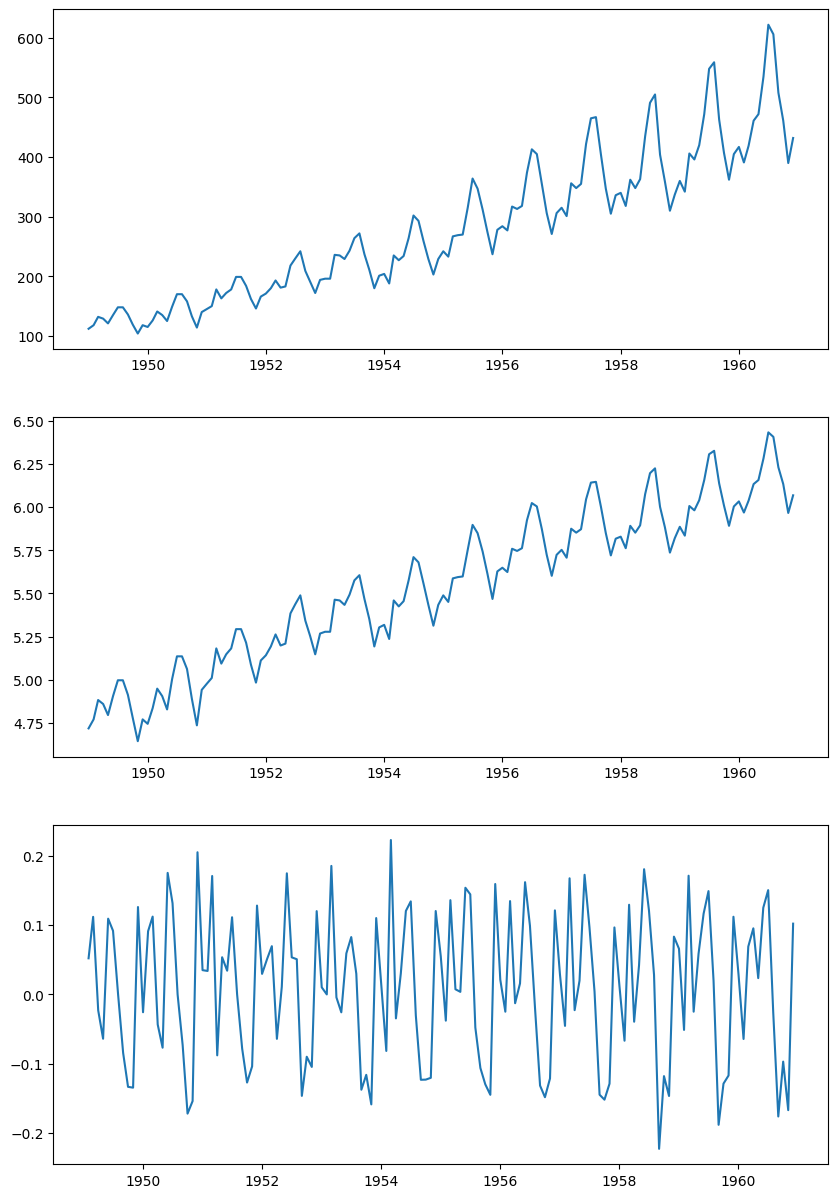

In [11]:
fig = plt.figure(figsize=(10, 15))
ax1, ax2, ax3 = fig.subplots(3, 1)

ax1.plot(df["y"])
ax2.plot(df["y_log"])
ax3.plot(df["y_log_diff"])

In [12]:
df["y_log_diff_mean"] = df["y_log_diff"].mean()
df["y_error_mean"] = df["y_log_diff"] - df["y_log_diff_mean"]

In [13]:
df.head()

,y,y_log,y_log_diff,y_log_diff_mean,y_error_mean
ds,,,,,
1949-01-01,112,4.718499,NaN,0.00944,NaN
1949-02-01,118,4.770685,0.052186,0.00944,0.042746
1949-03-01,132,4.882802,0.112117,0.00944,0.102677
1949-04-01,129,4.859812,-0.022990,0.00944,-0.032430
1949-05-01,121,4.795791,-0.064022,0.00944,-0.073462


In [14]:
root_mean_squared_error(
    y_true=df["y_log_diff"].dropna(), y_pred=df["y_log_diff_mean"].iloc[1:]
)

0.10618291994692682

<Axes: xlabel='ds'>

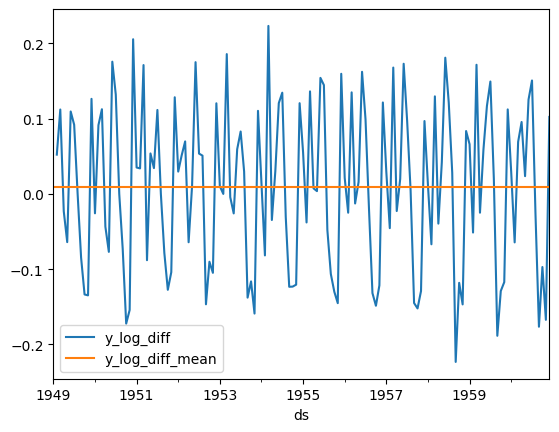

In [15]:
(df[["y_log_diff", "y_log_diff_mean"]].plot())

In [35]:
# ts = df[["y_log_diff"]].dropna()
ts = df[["y_log"]].dropna()

In [36]:
len_ts = ts.shape[0]

In [37]:
# nos quedamos con el 90% de los datos para entrenar
train_index = int(len_ts * 0.9)

In [38]:
train_ts = ts.iloc[:train_index]
test_ts = ts.iloc[train_index:]

In [39]:
train_ts.tail(1)

,y_log
ds,
1959-09-01,6.137727


In [40]:
test_ts.head(1)

,y_log
ds,
1959-10-01,6.008813


In [41]:
model = pmdarima.AutoARIMA()

In [42]:
model.fit(y=train_ts)

AutoARIMA()

In [43]:
model.model_

ARIMA(order=(4, 1, 2), scoring_args={}, suppress_warnings=True)

In [44]:
y_pred_test = model.predict(n_periods=len(test_ts))

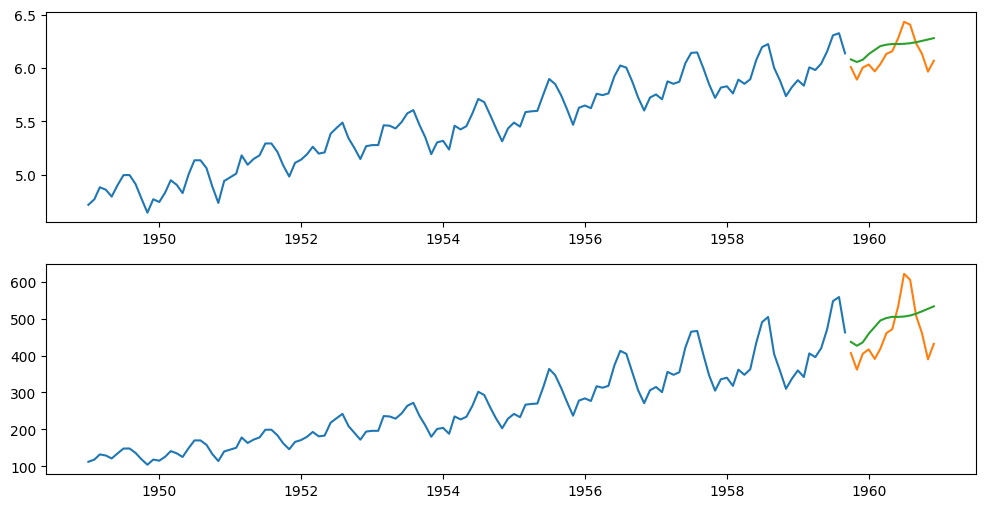

In [45]:
fig = plt.figure(figsize=(12, 6))
ax1, ax2 = fig.subplots(2, 1)

ax1.plot(train_ts)
ax1.plot(test_ts)
ax1.plot(y_pred_test)

ax2.plot(train_ts.apply(np.exp))
ax2.plot(test_ts.apply(np.exp))
ax2.plot(y_pred_test.apply(np.exp))

In [74]:
rw = (
    pd.read_csv("ts_rw.csv", index_col=0)[["ts", "y"]]
    .assign(
        ts=lambda df: pd.to_datetime(df["ts"], format="%Y-%m-%d"),
        ts_diff=lambda df: df["y"].diff(),
    )
    .set_index("ts")
)

In [75]:
rw.shape

(1001, 2)

<Axes: xlabel='ts'>

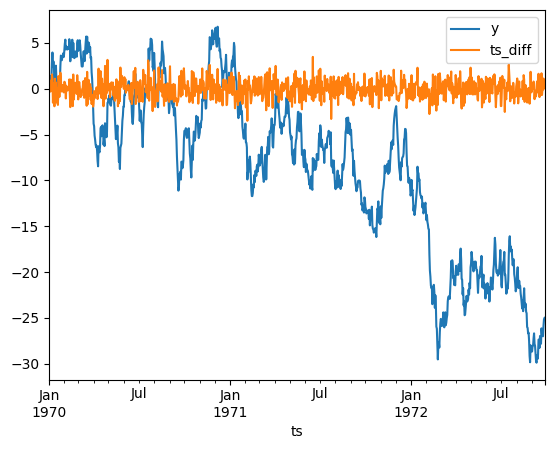

In [76]:
rw.plot()